In [2]:
import pandas as pd
import astropy.io.fits as fits
import plot_color as pc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Read in FITS Binary Table catalog

In [3]:
catalog = '/mnt/drive2/pittsburgh_catalog/DEEP2_uniq_Terapix_Subaru_30_31_combined_v0.3b.fits'
hdulist = fits.open(catalog)
hdulist.info()

Filename: /mnt/drive2/pittsburgh_catalog/DEEP2_uniq_Terapix_Subaru_30_31_combined_v0.3b.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    171   23822R x 77C   [J, D, D, D, D, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, K, K, K, E, E, 6A, 6A, 10A, 4A, 3A, 10A, E, E, E, E, E, E, E, E, I, J, 140A, E, E, D, D, D, D, D, D, D, D]   


# Place data in a dataframe

In [4]:
cols = hdulist[1].columns.names
col_types = hdulist[1].columns.formats
data = hdulist[1].data

# only select required columns
columns_wanted = ['OBJNO', 'U_APERCOR', 'G_APERCOR', 'R_APERCOR', 'I_APERCOR', 'I2_APERCOR',
                  'Z_APERCOR', 'Y_APERCOR', 'ZHELIO', 'ZQUALITY']

# extract data from BinTable and put in array
nrows = len(data)
ncols = len(columns_wanted)
data_array = np.zeros((nrows, ncols))


mapping = np.zeros((ncols,), dtype=int)
for i, row in enumerate(data):
    
    for j in range(len(row)):
        
        if cols[j] in columns_wanted:
            
            ii = columns_wanted.index(cols[j])
            data_array[i,ii] = row[j]
            
            # how ith column in columns_wanted maps to column in cols
            if (i<1):
                mapping[ii] = j
            


In [5]:
# place columns_wanted in order that matches the array
col_ordered = []
for m in mapping:
    col_ordered.append(cols[m])
print col_ordered
print data_array

['OBJNO', 'U_APERCOR', 'G_APERCOR', 'R_APERCOR', 'I_APERCOR', 'I2_APERCOR', 'Z_APERCOR', 'Y_APERCOR', 'ZHELIO', 'ZQUALITY']
[[  1.10016730e+07   2.35881486e+01   2.34488699e+01 ...,   2.19118566e+01
    1.11526132e+00   2.00000000e+00]
 [  1.10016990e+07   3.08810846e+01   2.90036552e+01 ...,   1.87969560e+01
    2.90607810e-01   4.00000000e+00]
 [  1.10017700e+07   2.43689786e+01   2.42917028e+01 ...,  -9.90000000e+01
    6.05743647e-01   1.00000000e+00]
 ..., 
 [  1.41017420e+07   2.43285571e+01   2.43890653e+01 ...,  -9.90000000e+01
    9.13566709e-01   4.00000000e+00]
 [  1.41017530e+07   2.45641451e+01   2.43753652e+01 ...,  -9.90000000e+01
    5.20134985e-01   4.00000000e+00]
 [  1.41017540e+07   2.49742216e+01   2.43998414e+01 ...,  -9.90000000e+01
    5.13978720e-01   2.00000000e+00]]


In [6]:
# create pandas dataframe
observed_data = pd.DataFrame(data_array, columns=col_ordered)
observed_data.head()

,OBJNO,U_APERCOR,G_APERCOR,R_APERCOR,I_APERCOR,I2_APERCOR,Z_APERCOR,Y_APERCOR,ZHELIO,ZQUALITY
0,11001673.0,23.588149,23.448870,23.091685,22.760156,-99.0,22.208882,21.911857,1.115261,2.0
1,11001699.0,30.881085,29.003655,19.019821,99.000000,-99.0,99.000000,18.796956,0.290608,4.0
2,11001770.0,24.368979,24.291703,24.141498,23.437295,-99.0,23.559196,-99.000000,0.605744,1.0
3,11001800.0,99.000000,24.822301,23.627649,23.000210,-99.0,22.674508,22.522148,1.306796,1.0
4,11001860.0,24.406260,24.154916,23.481455,22.768175,-99.0,22.304597,22.088048,0.957669,4.0


# Add colors to dataframe

In [7]:
# add colors to dataframe
mag_columns = ['U_APERCOR', 'G_APERCOR', 'R_APERCOR', 'I_APERCOR', 'Z_APERCOR', 'Y_APERCOR']
ncolor = len(mag_columns)-1
for i in range(ncolor):
    color_name = mag_columns[i] + "-" + mag_columns[i+1]
        
    # add color column to dust simulation
    observed_data[color_name] = observed_data[mag_columns[i]] - \
                                     observed_data[mag_columns[i+1]]
        
# add colors for I2 filter
color_name = "R_APERCOR-I2_APERCOR"
observed_data[color_name] = observed_data['R_APERCOR'] - \
                                     observed_data['I2_APERCOR']
color_name = "I2_APERCOR-Z_APERCOR"
observed_data[color_name] = observed_data['I2_APERCOR'] - \
                                     observed_data['Z_APERCOR']
    
observed_data.head()

,OBJNO,U_APERCOR,G_APERCOR,R_APERCOR,I_APERCOR,I2_APERCOR,Z_APERCOR,Y_APERCOR,ZHELIO,ZQUALITY,U_APERCOR-G_APERCOR,G_APERCOR-R_APERCOR,R_APERCOR-I_APERCOR,I_APERCOR-Z_APERCOR,Z_APERCOR-Y_APERCOR,R_APERCOR-I2_APERCOR,I2_APERCOR-Z_APERCOR
0,11001673.0,23.588149,23.448870,23.091685,22.760156,-99.0,22.208882,21.911857,1.115261,2.0,0.139279,0.357185,0.331529,0.551274,0.297026,122.091685,-121.208882
1,11001699.0,30.881085,29.003655,19.019821,99.000000,-99.0,99.000000,18.796956,0.290608,4.0,1.877429,9.983834,-79.980179,0.000000,80.203044,118.019821,-198.000000
2,11001770.0,24.368979,24.291703,24.141498,23.437295,-99.0,23.559196,-99.000000,0.605744,1.0,0.077276,0.150205,0.704203,-0.121901,122.559196,123.141498,-122.559196
3,11001800.0,99.000000,24.822301,23.627649,23.000210,-99.0,22.674508,22.522148,1.306796,1.0,74.177699,1.194652,0.627439,0.325702,0.152360,122.627649,-121.674508
4,11001860.0,24.406260,24.154916,23.481455,22.768175,-99.0,22.304597,22.088048,0.957669,4.0,0.251343,0.673461,0.713280,0.463578,0.216549,122.481455,-121.304597


# Check CFHT+Subaru data


In [8]:
print "Number observed with I =", len(observed_data[abs(observed_data['I_APERCOR'])<50])
print "Number observed with I2 =", len(observed_data[abs(observed_data['I2_APERCOR'])<50])
print "Total number in catalog =", len(observed_data)
observed_data[['I2_APERCOR','I_APERCOR']].describe()

Number observed with I = 22905
Number observed with I2 = 14654
Total number in catalog = 23822


,I2_APERCOR,I_APERCOR
count,23822.000000,23822.000000
mean,-22.862058,21.010692
std,59.743906,20.785484
min,-99.000000,-99.000000
25%,-99.000000,22.005730
50%,21.887613,22.902231
75%,23.232054,23.486212
max,99.000000,99.000000


# Plot colors (where detected in both bands)

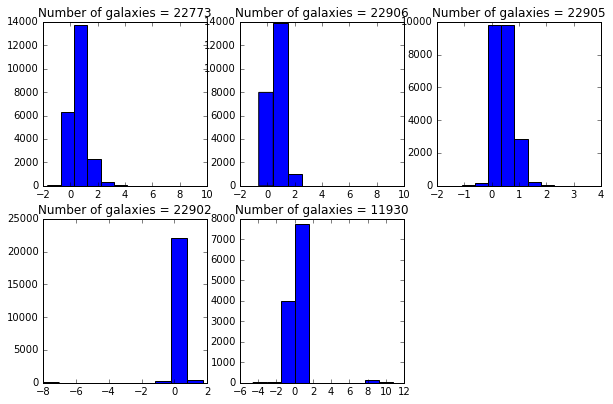

In [9]:
color_columns =['U_APERCOR-G_APERCOR', 'G_APERCOR-R_APERCOR', 'R_APERCOR-I_APERCOR', 
                'I_APERCOR-Z_APERCOR', 'Z_APERCOR-Y_APERCOR']

fig = plt.figure(figsize=(10,10))
for i, color in enumerate(color_columns):
    
    mag1 = color.split('-')[0]
    mag2 = color.split('-')[1]
    ifinite = (abs(observed_data[mag1])<50) & (abs(observed_data[mag2])<50)
    
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(observed_data.loc[ifinite, color])
    nc = len(observed_data[ifinite])
    ax.set_title("Number of galaxies = " + str(nc))

# Plot magnitudes

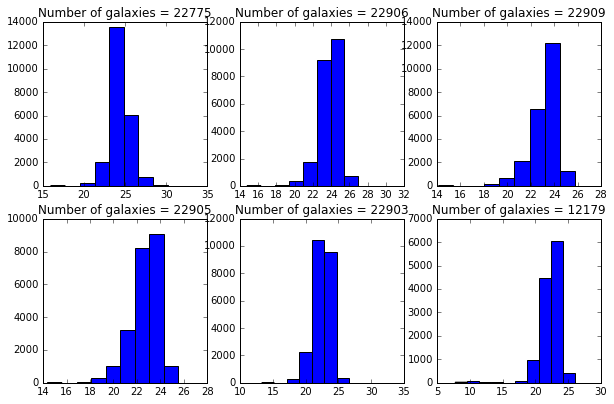

In [10]:
fig = plt.figure(figsize=(10,10))
for i, mag in enumerate(mag_columns):
    
    ifinite = (abs(observed_data[mag])<50)
    
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(observed_data.loc[ifinite, mag])
    nc = len(observed_data[ifinite])
    ax.set_title("Number of galaxies = " + str(nc))

# Galacticus data

In [11]:
galacticus_dust = pd.read_csv('dust.txt', sep='\s+')
print galacticus_dust.columns
galacticus_dust.head()

Index([u'redshift', u'LSSTu', u'LSSTg', u'LSSTr', u'LSSTi', u'LSSTz',
       u'LSSTy'],
      dtype='object')


,redshift,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy
0,2.00673,26.0028,25.5853,25.5494,25.5100,25.2827,25.0658
1,2.00085,28.5426,28.1210,28.1623,28.1160,27.9659,27.8720
2,2.00674,28.7974,28.2089,27.9281,27.7141,27.2492,26.8432
3,2.00674,25.4283,24.9257,24.7801,24.7766,24.5820,24.4147
4,2.00668,24.1561,23.8448,23.8962,23.9201,23.8549,23.7983


In [12]:
mag_columns = ['LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy']
ncolor = len(mag_columns)-1
for i in range(ncolor):
    color_name = mag_columns[i] + "-" + mag_columns[i+1]
        
    # add color column to dust simulation
    galacticus_dust[color_name] = galacticus_dust[mag_columns[i]] - \
                                     galacticus_dust[mag_columns[i+1]]
   

print "Dust simulation:"
print galacticus_dust.head()

Dust simulation:
   redshift    LSSTu    LSSTg    LSSTr    LSSTi    LSSTz    LSSTy  \
0   2.00673  26.0028  25.5853  25.5494  25.5100  25.2827  25.0658   
1   2.00085  28.5426  28.1210  28.1623  28.1160  27.9659  27.8720   
2   2.00674  28.7974  28.2089  27.9281  27.7141  27.2492  26.8432   
3   2.00674  25.4283  24.9257  24.7801  24.7766  24.5820  24.4147   
4   2.00668  24.1561  23.8448  23.8962  23.9201  23.8549  23.7983   

   LSSTu-LSSTg  LSSTg-LSSTr  LSSTr-LSSTi  LSSTi-LSSTz  LSSTz-LSSTy  
0       0.4175       0.0359       0.0394       0.2273       0.2169  
1       0.4216      -0.0413       0.0463       0.1501       0.0939  
2       0.5885       0.2808       0.2140       0.4649       0.4060  
3       0.5026       0.1456       0.0035       0.1946       0.1673  
4       0.3113      -0.0514      -0.0239       0.0652       0.0566  


# Color vs redshift (up to z band)
## only selection r<23.5

In [13]:
# redshift binning to make the plots
zmin = 0.
zmax = 2.
dbin = 0.2

# name of redshift column in each dataframe (galacticus, cfht-subaru)
z_columns = ["redshift", "ZHELIO"]

/mnt/drive2/repos/PhotoZDC1/validation/plot_color.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1["cut_output"] = pd.cut(df1[z_column1], np.arange(zmin, zmax+dbin, dbin))
/mnt/drive2/repos/PhotoZDC1/validation/plot_color.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2["cut_output"] = pd.cut(df2[z_column2], np.arange(zmin, zmax+dbin, dbin))


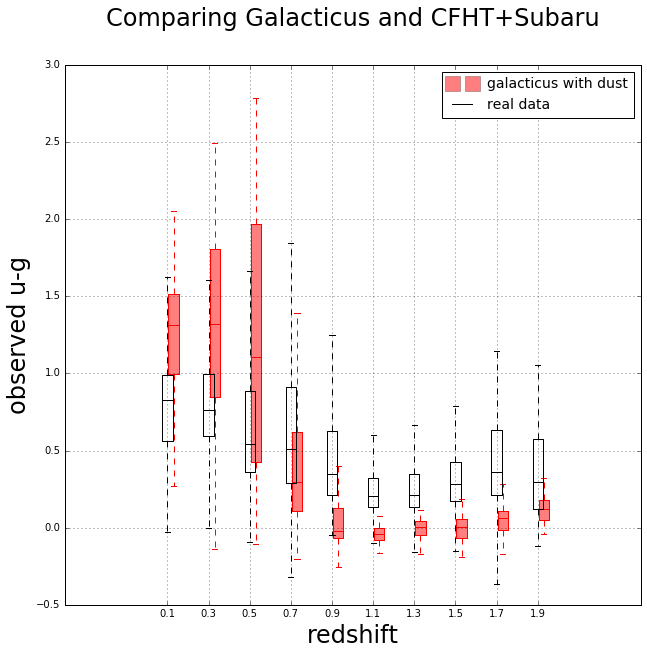

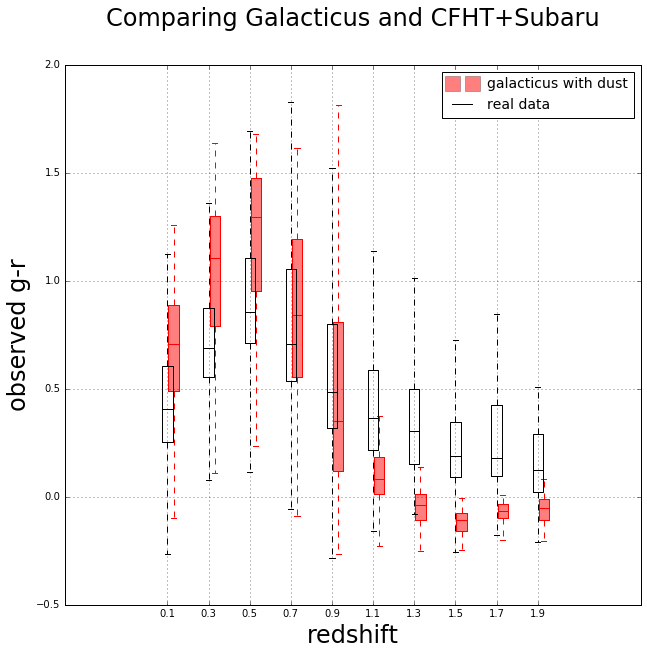

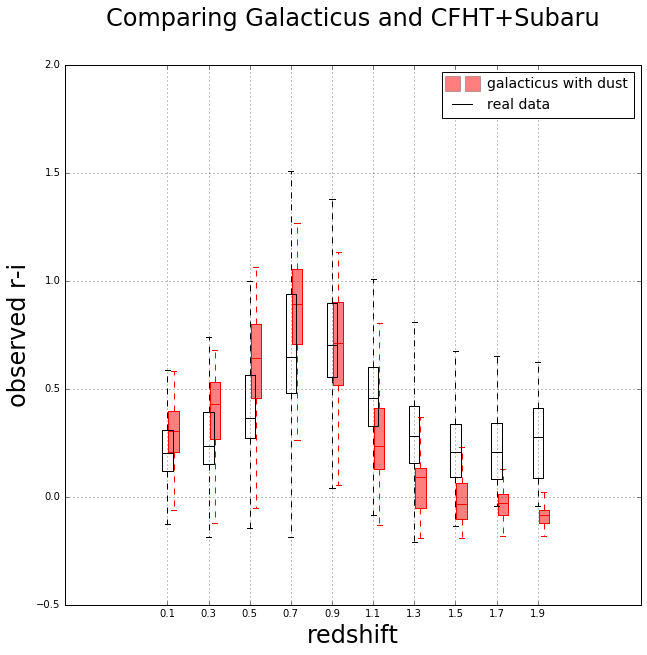

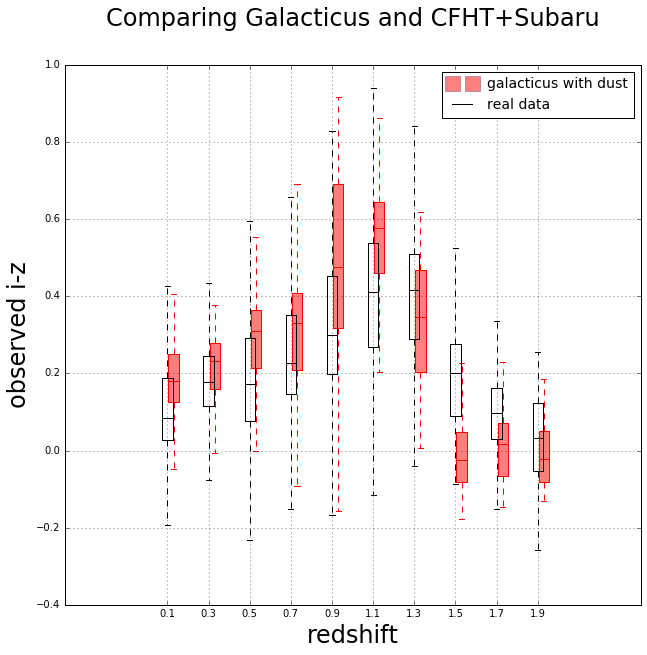

In [14]:
mag_lim = 23.5

# for each color list of: [name_in_galacticus, name_in_cfht_subaru]
color_pairs = [['LSSTu-LSSTg', 'U_APERCOR-G_APERCOR'], ['LSSTg-LSSTr', 'G_APERCOR-R_APERCOR'], 
               ['LSSTr-LSSTi', 'R_APERCOR-I_APERCOR'], ['LSSTi-LSSTz', 'I_APERCOR-Z_APERCOR']]
    
# names of the colors to go on the plot axes
color_names = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']


for color_name, color_columns in zip(color_names, color_pairs):
    
    # initalise axes to add boxplots to
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    # select galaxies
    iselect_sim = (galacticus_dust["LSSTr"]<=mag_lim)
    iselect_obs = (observed_data["R_APERCOR"]<=mag_lim)

        
    legend_handles = pc.color_boxplot(
                     ax,                 # axes to plot on  
                     galacticus_dust[iselect_sim],    # dataframe 1
                     observed_data[iselect_obs],      # dataframe 2
                     color_columns,      # list of names of each color in [[df1, df2]]
                     z_columns,          # name of redshift column in [df1, df2] 
                     zmin, zmax, dbin,   # zmin, zmax, dbin to define the redshift binning
                     zbin_offset=0.03,   # how much to offset 2nd set of color plots by
                     color1='red',       # dataframe 1 will be this color, and shaded 
                     color2='black',     # dataframe 2 will be outlined in this color 
                     boxwidth=0.05,      # how wide in redshift boxplots appear
                     showfliers=False    # show the flier points or not
                     )
    
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel('observed ' + color_name, fontsize=24)
    fig.suptitle('Comparing Galacticus and CFHT+Subaru', fontsize=24)
    ax.set_title('')
    
    # the legend will come out with text 'data1' and 'data2'
    # fix it to whatever you like with the below
    
    # fix legend    
    labels = ['galacticus with dust', 'real data']
    ax.legend(legend_handles, labels, prop={'size':14}, loc='upper right')

# z-Y vs redshift (galaxies with Subaru Y)
## only selection r<23.5

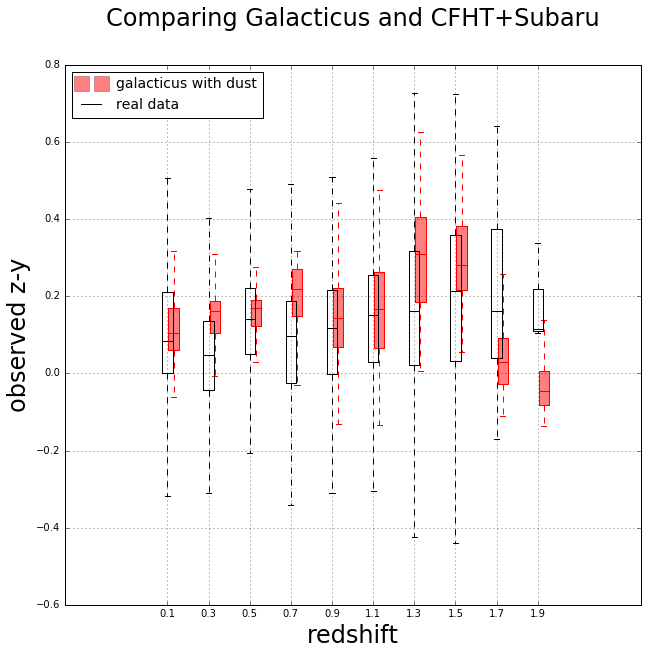

In [15]:
# for each color list of: [name_in_galacticus, name_in_cfht_subaru]
color_pairs = [ ['LSSTz-LSSTy', 'Z_APERCOR-Y_APERCOR'] ]
    
# names of the colors to go on the plot axes
color_names = ['z-y']
    
for color_name, color_columns in zip(color_names, color_pairs):
    
    # initalise axes to add boxplots to
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    # select galaxies
    iselect_sim = (galacticus_dust["LSSTr"]<=mag_lim)
    iselect_obs = (observed_data["R_APERCOR"]<=mag_lim) & (abs(observed_data["Y_APERCOR"])<50)

        
    legend_handles = pc.color_boxplot(
                     ax,                 # axes to plot on  
                     galacticus_dust[iselect_sim],    # dataframe 1
                     observed_data[iselect_obs],      # dataframe 2
                     color_columns,      # list of names of each color in [[df1, df2]]
                     z_columns,          # name of redshift column in [df1, df2] 
                     zmin, zmax, dbin,   # zmin, zmax, dbin to define the redshift binning
                     zbin_offset=0.03,   # how much to offset 2nd set of color plots by
                     color1='red',       # dataframe 1 will be this color, and shaded 
                     color2='black',     # dataframe 2 will be outlined in this color 
                     boxwidth=0.05,      # how wide in redshift boxplots appear
                     showfliers=False    # show the flier points or not
                     )
    
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel('observed ' + color_name, fontsize=24)
    fig.suptitle('Comparing Galacticus and CFHT+Subaru', fontsize=24)
    ax.set_title('')
    
    # the legend will come out with text 'data1' and 'data2'
    # fix it to whatever you like with the below
    
    # fix legend    
    labels = ['galacticus with dust', 'real data']
    ax.legend(legend_handles, labels, prop={'size':14}, loc='upper left')

## selection r<21.1

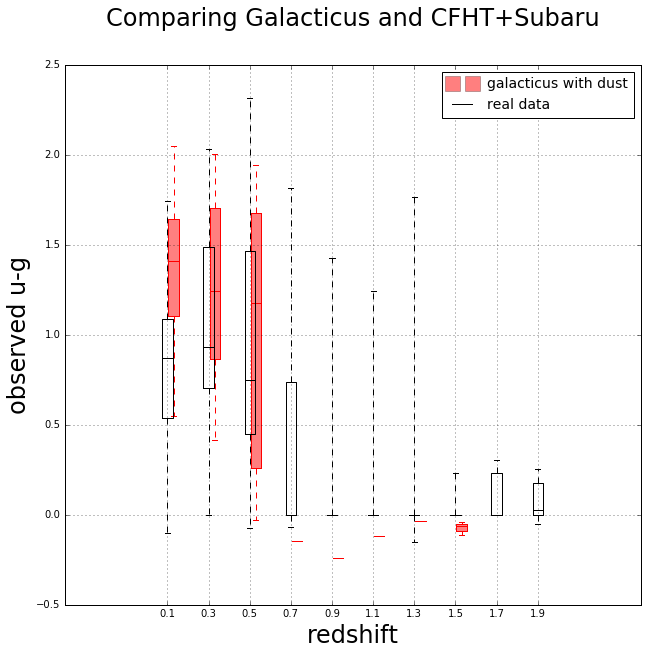

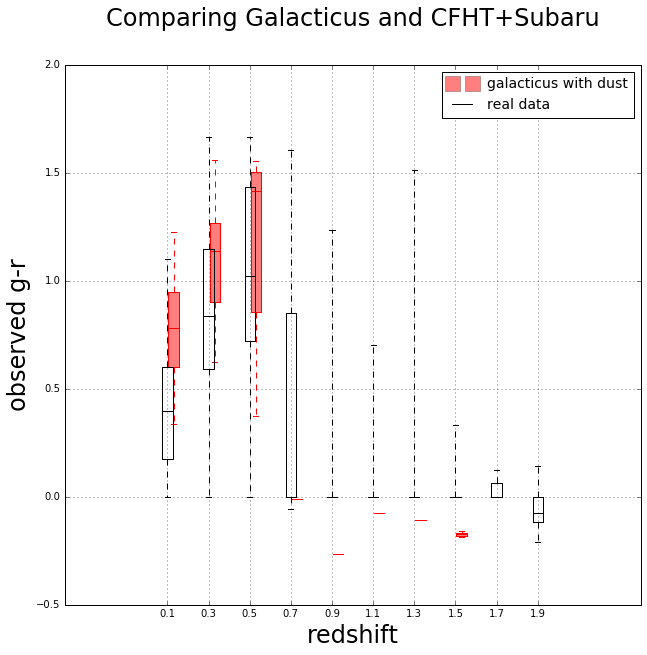

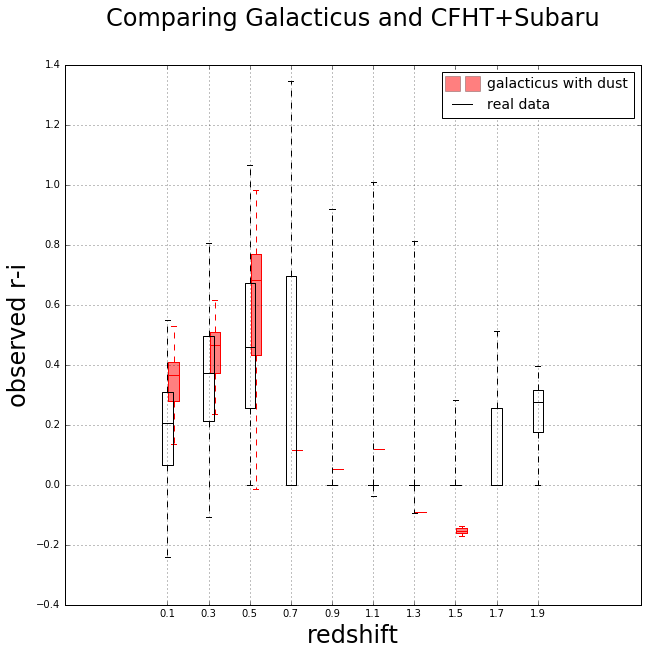

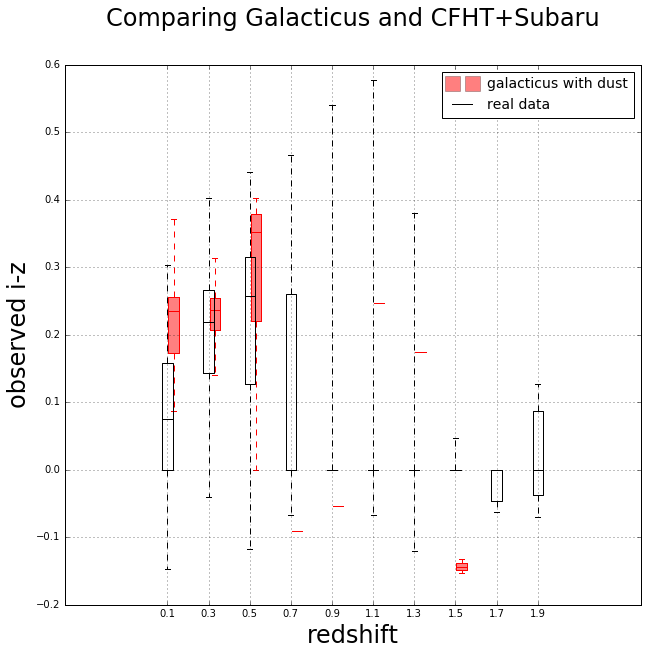

In [16]:
mag_lim = 21.1

# for each color list of: [name_in_galacticus, name_in_cfht_subaru]
color_pairs = [['LSSTu-LSSTg', 'U_APERCOR-G_APERCOR'], ['LSSTg-LSSTr', 'G_APERCOR-R_APERCOR'], 
               ['LSSTr-LSSTi', 'R_APERCOR-I_APERCOR'], ['LSSTi-LSSTz', 'I_APERCOR-Z_APERCOR']]
    
# names of the colors to go on the plot axes
color_names = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']


for color_name, color_columns in zip(color_names, color_pairs):
    
    # initalise axes to add boxplots to
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    # select galaxies
    iselect_sim = (galacticus_dust["LSSTr"]<=mag_lim)
    iselect_obs = (observed_data["R_APERCOR"]<=mag_lim)

        
    legend_handles = pc.color_boxplot(
                     ax,                 # axes to plot on  
                     galacticus_dust[iselect_sim],    # dataframe 1
                     observed_data[iselect_obs],      # dataframe 2
                     color_columns,      # list of names of each color in [[df1, df2]]
                     z_columns,          # name of redshift column in [df1, df2] 
                     zmin, zmax, dbin,   # zmin, zmax, dbin to define the redshift binning
                     zbin_offset=0.03,   # how much to offset 2nd set of color plots by
                     color1='red',       # dataframe 1 will be this color, and shaded 
                     color2='black',     # dataframe 2 will be outlined in this color 
                     boxwidth=0.05,      # how wide in redshift boxplots appear
                     showfliers=False    # show the flier points or not
                     )
    
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel('observed ' + color_name, fontsize=24)
    fig.suptitle('Comparing Galacticus and CFHT+Subaru', fontsize=24)
    ax.set_title('')
    
    # the legend will come out with text 'data1' and 'data2'
    # fix it to whatever you like with the below
    
    # fix legend    
    labels = ['galacticus with dust', 'real data']
    ax.legend(legend_handles, labels, prop={'size':14}, loc='upper right')